# In this Notebook we will be analyzing our data images wrt categories


In [20]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Collecting opencv-python



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

#from skimage.io import imread
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

In [2]:
base_dataset_dir = "E:\Major Project 2022\Dataset"
image_label_dict={'Path':[],'Label':[]} #initialise Image to Label Mapping
label_subsets = {'Labels':[],'Subsets':[]}
fixed_size=(472,720)

In [4]:
# Iterating Folders and Adding Images with Labels 

for label in os.listdir(base_dataset_dir):
    
    label_folder = os.path.join(base_dataset_dir,label)
    subsets = 0
    
    for folder in os.listdir(label_folder):
        
        folder = os.path.join(label_folder,folder)
        subsets+=1
        
        for filename in os.listdir(folder):
            
            filename = os.path.join(folder,filename)
            
            image_label_dict['Path'].append(filename)
            
            image_label_dict['Label'].append(label)
            
    label_subsets['Labels'].append(label)
    label_subsets['Subsets'].append(subsets)
    
            
#print(image_label_dict)
image_df = pd.DataFrame(image_label_dict)
labels_df = pd.DataFrame(label_subsets)

image_df.head()
labels_df.head()

,Labels,Subsets
0,Acne,1
1,Eczema,5
2,Fungal Infection,2
3,Pigmental Disorders,2
4,Psoriasis,1


In [5]:
image_df.sample(10)

,Path,Label
13394,E:\Major Project 2022\Dataset\Tumors\Actinic K...,Tumors
14231,E:\Major Project 2022\Dataset\Tumors\Melanoma ...,Tumors
2578,E:\Major Project 2022\Dataset\Eczema\Eczema Ph...,Eczema
16391,E:\Major Project 2022\Dataset\Tumors\Vascular ...,Tumors
11424,E:\Major Project 2022\Dataset\STDs\Warts Mollu...,STDs
9031,E:\Major Project 2022\Dataset\Psoriasis\Psoria...,Psoriasis
6769,E:\Major Project 2022\Dataset\Fungal Infection...,Fungal Infection
9021,E:\Major Project 2022\Dataset\Psoriasis\Psoria...,Psoriasis
14855,E:\Major Project 2022\Dataset\Tumors\Seborrhei...,Tumors
6962,E:\Major Project 2022\Dataset\Fungal Infection...,Fungal Infection


<AxesSubplot:title={'center':'Counts for each type of Disease'}>

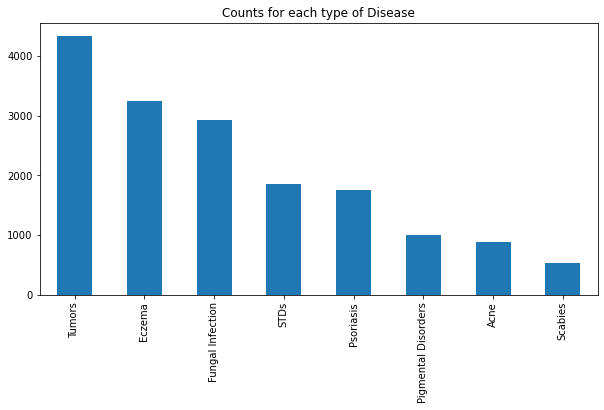

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
image_df["Label"].value_counts().plot(kind="bar", ax=ax1, title="Counts for each type of Disease") 
# plot a graph displaying distibution of images

<AxesSubplot:title={'center':'Distribution of each type of Disease'}, ylabel='Label'>

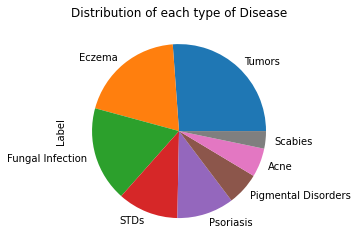

In [7]:
image_df["Label"].value_counts().plot(kind="pie", title="Distribution of each type of Disease") 

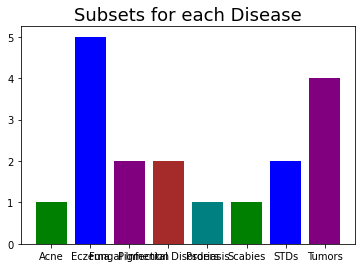

In [8]:
New_Colors = ['green','blue','purple','brown','teal']
plt.bar(labels_df['Labels'], labels_df['Subsets'], color=New_Colors)
plt.title('Subsets for each Disease', fontsize=18)
plt.show()

Data Coversion :
    Images are converted into different formats of arrays
    

In [9]:
image_to_array = []
errors=[]
for image_index in range(len(image_df["Path"])):
    try:
        img=cv2.imread(image_df["Path"][image_index])
        img=cv2.resize(img,fixed_size,interpolation=cv2.INTER_CUBIC)
        image_to_array.append(np.array(img))
    except:
        image_to_array.append(np.zeros((1, 1, 3)))
        errors.append(image_index)

print("No. of outliners :",len(errors))

No. of outliners : 137


In [10]:
image_df["image"]=image_to_array

In [11]:
image_df.sample(10)

,Path,Label,image
2001,E:\Major Project 2022\Dataset\Eczema\Eczema Ph...,Eczema,"[[[89, 89, 104], [91, 93, 110], [91, 93, 111],..."
12634,E:\Major Project 2022\Dataset\Tumors\Actinic K...,Tumors,"[[[160, 178, 237], [167, 183, 242], [170, 184,..."
14945,E:\Major Project 2022\Dataset\Tumors\Seborrhei...,Tumors,"[[[149, 168, 195], [146, 165, 192], [149, 168,..."
11399,E:\Major Project 2022\Dataset\STDs\Warts Mollu...,STDs,"[[[74, 63, 103], [75, 64, 104], [76, 65, 106],..."
4724,E:\Major Project 2022\Dataset\Fungal Infection...,Fungal Infection,"[[[72, 77, 92], [68, 73, 88], [75, 80, 95], [7..."
6289,E:\Major Project 2022\Dataset\Fungal Infection...,Fungal Infection,"[[[13, 11, 17], [10, 8, 14], [11, 9, 15], [6, ..."
5775,E:\Major Project 2022\Dataset\Fungal Infection...,Fungal Infection,"[[[125, 132, 165], [134, 140, 173], [137, 142,..."
14772,E:\Major Project 2022\Dataset\Tumors\Seborrhei...,Tumors,"[[[137, 109, 115], [132, 102, 108], [158, 127,..."
12269,E:\Major Project 2022\Dataset\Tumors\Actinic K...,Tumors,"[[[98, 108, 148], [101, 111, 151], [95, 105, 1..."
4412,E:\Major Project 2022\Dataset\Fungal Infection...,Fungal Infection,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [12]:
image_df=image_df.drop(index=errors)
print("Final data:",image_df.sample(5))

Final data:                                                     Path   Label  \
1638   E:\Major Project 2022\Dataset\Eczema\Eczema Ph...  Eczema   
16467  E:\Major Project 2022\Dataset\Tumors\Vascular ...  Tumors   
10615  E:\Major Project 2022\Dataset\STDs\Herpes HPV ...    STDs   
14180  E:\Major Project 2022\Dataset\Tumors\Melanoma ...  Tumors   
148    E:\Major Project 2022\Dataset\Acne\Acne and Ro...    Acne   

                                                   image  
1638   [[[13, 8, 9], [13, 10, 11], [8, 4, 9], [7, 2, ...  
16467  [[[171, 171, 217], [171, 171, 217], [163, 164,...  
10615  [[[20, 36, 78], [41, 55, 97], [56, 67, 111], [...  
14180  [[[99, 109, 127], [101, 111, 129], [99, 108, 1...  
148    [[[3, 4, 2], [3, 4, 2], [3, 4, 2], [3, 4, 2], ...  


In [13]:
image_df["image"].map(lambda x: x.shape).value_counts() 

(720, 472, 3)    16431
Name: image, dtype: int64

There are multiple different sizes of images available
(472, 720, 3)    4499
(480, 720, 3)    1861
(720, 480, 3)     913
(474, 720, 3)     501
(477, 720, 3)     473
                 ... 
(720, 593, 3)       1
(720, 720, 3)       1
(426, 720, 3)       1
(458, 484, 3)       1
(720, 531, 3)       1
Name: image, Length: 458, dtype: int64

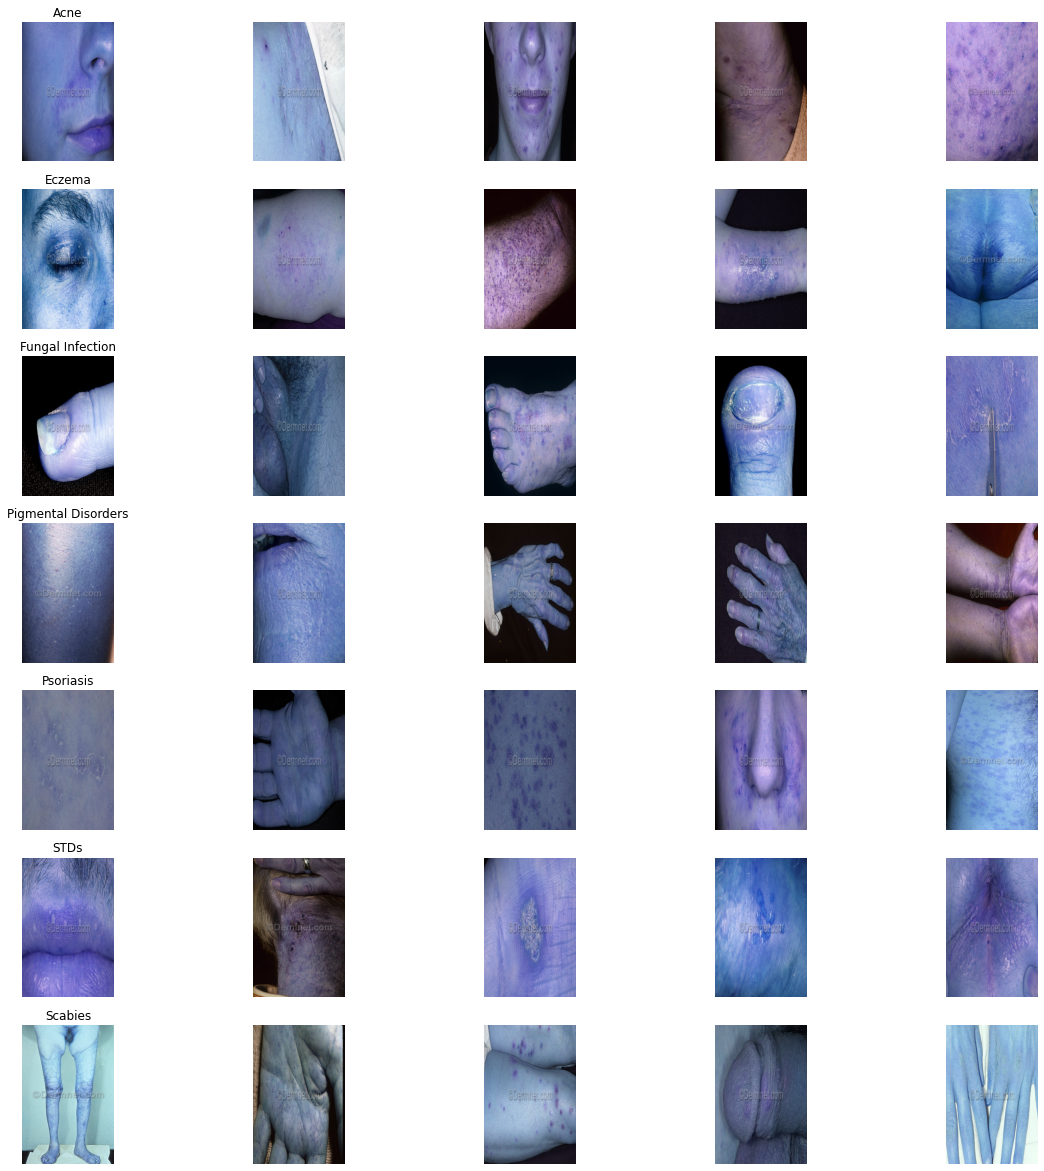

In [14]:
# let's have a look at the image data

n_samples = 5 # choose 5 samples for each cell type
fig, m_axs = plt.subplots(7, n_samples, figsize=(4*n_samples, 3 * 7))

for n_axs, (type_name, type_rows) in zip(m_axs, image_df.sort_values(["Label"]).groupby("Label")):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=0).iterrows()):
        c_ax.imshow(c_row["image"])
        c_ax.axis("off")
fig.savefig("category_samples.png", dpi=300)

Resizing Images for Base Model

In [15]:
image_df["label_no"] = pd.Categorical(image_df["Label"]).codes

In [16]:
reshaped_image = image_df["Path"].map(lambda x: np.asarray(Image.open(x).resize((128,128), resample=Image.LANCZOS).\
                                                          convert("RGB")).ravel())

In [17]:
out_vec = np.stack(reshaped_image, 0)
out_df = pd.DataFrame(out_vec)
out_df["Label"] = [int(x) for x in image_df["label_no"]]

In [18]:
out_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,Label
5628,201,154,141,186,137,117,200,157,138,197,...,202,156,137,197,151,128,196,152,130,2
11640,138,216,230,130,211,224,122,205,220,119,...,145,215,224,143,214,221,147,216,224,5
16108,4,2,8,5,1,17,5,2,14,6,...,130,145,160,111,124,137,94,106,112,7
15084,166,128,176,168,134,182,164,130,180,163,...,102,71,118,100,75,123,96,73,120,7
6260,16,10,14,17,11,15,19,13,17,17,...,24,13,19,22,11,16,24,13,17,2


In [30]:
out_path = "128by128_Dataset_RBG.csv"
out_df.to_csv(base_dataset_dir+"/"+out_path, index=False)

In [32]:
out_df.info(memory_usage="deep")
out_df.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Columns: 49153 entries, 0 to Label
dtypes: int64(1), uint8(49152)
memory usage: 770.3 MB


807748088


Resize Image for Keras Fine-Tuning Model


In [33]:
reshaped_image_2 = image_df["Path"].map(lambda x: np.asarray(Image.open(x).resize((64,64), resample=Image.LANCZOS).\
                                                          convert("RGB")).ravel())
out_vec_2 = np.stack(reshaped_image_2, 0)
out_df_2 = pd.DataFrame(out_vec_2)
out_df_2["Label"] = [int(x) for x in image_df["label_no"]]


In [35]:
print(out_df_2.head())

     0    1    2    3    4    5    6    7    8    9  ...  12279  12280  12281  \
0  160  126  120  158  122  117  157  119  117  158  ...     67     50     45   
1  163  129  124  154  121  112  145  110  101  140  ...    115     86     82   
2  222  162  160  218  152  151  219  158  157  220  ...    137    107    104   
3   91   67   61   95   68   60  105   73   67  109  ...    164    122    123   
4   20   15   12   27   19   15   18   10    7   23  ...     28     19     13   

   12282  12283  12284  12285  12286  12287  Label  
0     33     24     21      8      5      2      0  
1    111     82     78    105     76     74      0  
2    137    107    105    137    107    105      0  
3    162    121    121    161    120    117      0  
4     30     20     16     30     20     16      0  

[5 rows x 12289 columns]


In [36]:
out_path_2 = "64by64_Dataset_RBG.csv"
out_df_2.to_csv(base_dataset_dir+"/"+out_path_2, index=False)